In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [2]:
# Loading the data
df = pd.read_csv('synthetic_wedm_data.csv')

# Defining input features and targets
features = ['Ton', 'Toff', 'IP', 'SV', 'WF', 'WT']
X = df[features]
y_cr = df['CR']
y_sr = df['SR']

In [3]:
# Spliting into train and test (80/20)
X_train, X_test, y_cr_train, y_cr_test = train_test_split(X, y_cr, test_size=0.2, random_state=42)
_, _, y_sr_train, y_sr_test = train_test_split(X, y_sr, test_size=0.2, random_state=42)

# Fitting Linear Regression for CR
lr_cr = LinearRegression()
lr_cr.fit(X_train, y_cr_train)
y_cr_pred = lr_cr.predict(X_test)

# Fitting Linear Regression for SR
lr_sr = LinearRegression()
lr_sr.fit(X_train, y_sr_train)
y_sr_pred = lr_sr.predict(X_test)


In [4]:
# Evaluation Function
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    print(f"📊 Results for {label}")
    print(f"   → RMSE: {rmse:.4f}")
    print(f"   → R²:   {r2:.4f}")
    print(f"   → MAE:  {mae:.4f}\n")

# Evaluating CR
evaluate(y_cr_test, y_cr_pred, "Cutting Rate (CR)")

# Evaluating SR
evaluate(y_sr_test, y_sr_pred, "Surface Roughness (SR)")

# showing coefficients
coeffs_cr = pd.Series(lr_cr.coef_, index=features)
coeffs_sr = pd.Series(lr_sr.coef_, index=features)

print("📌 CR Linear Regression Coefficients:")
print(coeffs_cr)
print("\n📌 SR Linear Regression Coefficients:")
print(coeffs_sr)

📊 Results for Cutting Rate (CR)
   → RMSE: 0.0589
   → R²:   0.9893
   → MAE:  0.0471

📊 Results for Surface Roughness (SR)
   → RMSE: 0.0237
   → R²:   0.9926
   → MAE:  0.0189

📌 CR Linear Regression Coefficients:
Ton     0.607417
Toff   -0.002236
IP      0.012073
SV     -0.000027
WF      0.002315
WT      0.000395
dtype: float64

📌 SR Linear Regression Coefficients:
Ton     0.348629
Toff    0.000034
IP      0.006003
SV     -0.001187
WF     -0.000268
WT     -0.000004
dtype: float64


In [5]:
import joblib

In [6]:
joblib.dump(lr_cr, "models/linear_regression_cr.pkl")
joblib.dump(lr_sr, "models/linear_regression_sr.pkl")

print("Exported Linear Regression Surface Roughness (SR) & Cutting Rate (CR) models")

Exported Linear Regression Surface Roughness (SR) & Cutting Rate (CR) models


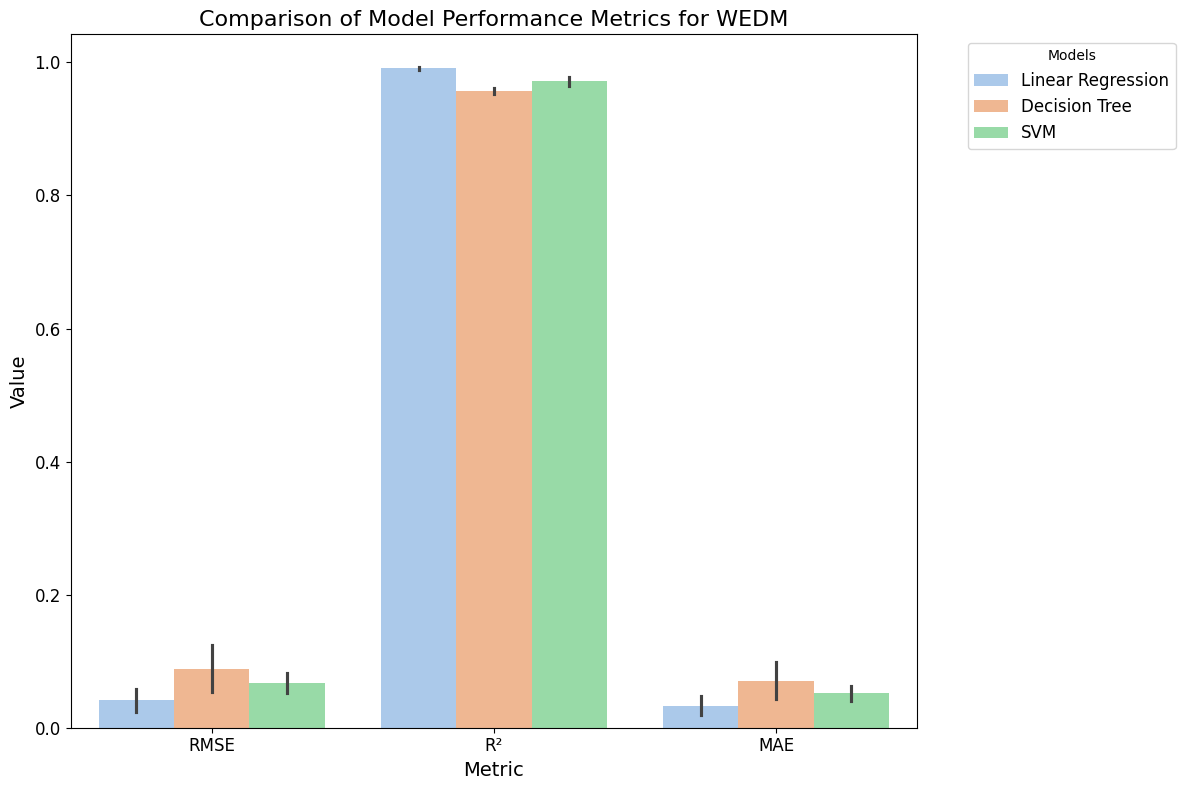

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the models

data = {
    'Model': ['Linear Regression', 'Decision Tree', 'SVM'] * 3,
    'Metric': ['RMSE'] * 3 + ['R²'] * 3 + ['MAE'] * 3,
    'Cutting Rate (CR)': [0.0589, 0.1242, 0.0830,  # RMSE
                          0.9893, 0.9525, 0.9788, # R²
                          0.0471, 0.0985, 0.0634], # MAE
    'Surface Roughness (SR)': [0.0237, 0.0536, 0.0524,  # RMSE
                               0.9926, 0.9623, 0.9640,  # R²
                               0.0189, 0.0433, 0.0405]  # MAE
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for plotting
df_melted = df.melt(id_vars=['Model', 'Metric'], var_name='Target', value_name='Value')

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='Metric', y='Value', hue='Model', palette='pastel')
plt.title('Comparison of Model Performance Metrics for WEDM', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()